# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie
In dit experiment gaan we ervan uit dat de temperatuur van de weerstand gelijk is aan die van het water. Het verband tussen de temperatuurverandering van het water en de elektrische energie in de weerstand wordt dan beschreven door:

$Q = c \cdot m \cdot \Delta T$



# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```

Meetplan:
- Weeg de maatbeker zonder water en de maatbeker met water, het verschil is de massa van het water
- Bouw de opstelling op zoals die in de figuur is weergegeven
- Zorg ervoor dat de roerder tijdens het experiment aanstaat om zo de warmte goed te verdelen.
- Meet de temperatuur van het water
- Zet nu de voedingsbron aan op 10V (de maximale waarde is 20V), meet elke 10 seconden de temperatuur van het waterbad
- Blijf meten totdat het water net niet begint te koken, noteer dan de eindtijd en eindtemperatuur.


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [1]:
# Hier de data en de analyse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

T = np.array([20.1,20.7,21.4,21.9,22.5,23.1,23.6,24.1,24.6,25.1,25.6,26.0,26.5,27.0,27.5])
time = np.arange(len(T))*60



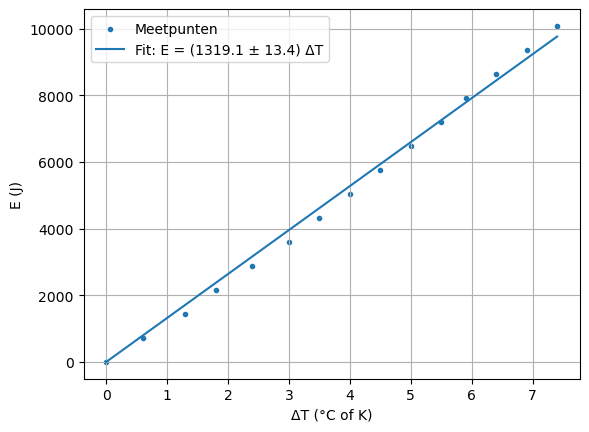

k = 1319.149 ± 13.351 J/K   (= m*c)
c = 6595.7 ± 66.8 J/(kg·K)


In [5]:
dt = 60                 # s tussen metingen
m  = 0.200              # kg water (voorbeeld: 200 g)
P  = 12.0               # W elektrisch vermogen (U*I)

# tijdas (start bij 0)
t = np.arange(len(T)) * dt

# ΔT t.o.v. begin
dT = T - T[0]

# elektrische energie (J)
E = P * t

# Fitmodel: E = k * ΔT  (k = m*c)
def model(dT, k):
    return k * dT

# Fit (neem eerste punt met ΔT=0 gerust mee; kan ook weglaten)
popt, pcov = curve_fit(model, dT, E)
k = popt[0]
dk = np.sqrt(np.diag(pcov))[0]

c = k / m
dc = dk / m

# Plot
xfit = np.linspace(dT.min(), dT.max(), 300)
plt.scatter(dT, E, marker='.', label='Meetpunten')
plt.plot(xfit, model(xfit, k), label=f'Fit: E = ({k:.1f} ± {dk:.1f}) ΔT')
plt.xlabel("ΔT (°C of K)")
plt.ylabel("E (J)")
plt.grid()
plt.legend()
plt.show()

print(f"k = {k:.3f} ± {dk:.3f} J/K   (= m*c)")
print(f"c = {c:.1f} ± {dc:.1f} J/(kg·K)")

# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.